# Deep learning framework example: Movie Review Dataset

This notebook demonstrates how to use the deeplearning API to train and test the model on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).  This dataset contains hand written digits and their labels.

Before you run this notebook, you must ensure the corpus is installed.  Please see the `README.md` file for more information.

**Important**: Please see the Iris notebook example in the `zensols.deeplearn` API first, as it contains more explaination of how the framework is used.  The purpose of this notebook is to run the MNIST dataset and visualize the results.

In [1]:
# set up notebook environment
import sys
app_root_dir = '..'
sys.path.append(app_root_dir + '/src')
# add the deepnlp path
sys.path.append('../../../src/python')

## Configure and create the app specific facade

Now that the interpreter environment is set up, we can import local packages.

In [2]:
import logging
from zensols.config import ImportConfigFactory
from zensols.deeplearn import TorchConfig
from movie import AppConfig, ReviewModelFacade

# set the random seed so things are predictable
TorchConfig.set_random_seed()

# configure the environment
config = AppConfig(config_file=app_root_dir + '/resources/movie.conf', env={'app_root': app_root_dir})

def create_facade():
    """Create and return a facade with columns that fit a notebook.
 
    """
    # create a factoty that instantiates Python objects using a simple configuration (INI)
    facade = ReviewModelFacade(config)
    # set console based logging
    facade.configure_jupyter(logging.WARNING)
    return facade

## Print information about 

Use the factory to create the model executor.  The `write` method gives statistics on the data set that is configured on the executor.

In [3]:
from zensols.config import Writable
# set indention level for human readable (pretty print like) output
Writable.WRITABLE_INDENT_SPACE = 2
facade = create_facade()
facade.write()

executor:
  model: Review
  feature splits:
    split stash splits:
        dev: 1029 (9.2%)
        test: 2099 (18.7%)
        train: 8086 (72.1%)
        total: 11214


2020-12-29 13:39:13,380[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0


    total this instance: 11214
    keys consistent: True
  batch splits:
    split stash splits:
        dev: 6 (10.3%)
        test: 11 (19.0%)
        train: 41 (70.7%)
        total: 58
    total this instance: 58
    keys consistent: True
    delegate:
      name: batch_stash
      chunk_size: 0
      workers: 3
      batch_size: 200
      data_point_id_sets_path: ../data/batch/batch-point-keys.dat
      batch_limit: 9223372036854775807
      delegate_attr: True
      _has_data: True
      is_child: False
      _decoded_attributes: {'glove_50_embedding', 'label'}
      priming: False
  network settings:
    name: net_settings
    dropout: 0.2
    recurrent_settings:
      name: recurrent_settings
      dropout: 0.2
      network_type: lstm
      aggregation: max
      bidirectional: True
      hidden_size: 36
      num_layers: 1
    linear_settings:
      name: linear_settings
      dropout: 0.2
      out_features: 2
      middle_features:
        10
      proportions: True
      r

## Train and test the model

Train and test the model with the default (low) number of epochs to make sure everything is working.

2020-12-29 13:39:13,391[INFO]zensols.deeplearn.model.executor.status: resetting executor
2020-12-29 13:39:13,392[INFO]zensols.deeplearn.model.facade: training...
2020-12-29 13:39:13,394[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
2020-12-29 13:39:16,602[INFO]zensols.deeplearn.model.executor.status: loaded 47 batches in 3s
2020-12-29 13:39:16,603[INFO]zensols.deeplearn.model.executor.status: train/test sets: 41 6
2020-12-29 13:39:16,607[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
2020-12-29 13:39:16,623[INFO]zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 2 epochs using learning rate 0.001
  0%|                                                                                             | 0/2 [00:00<?, ?it/s]2020-12-29 13:39:16,625[INFO]zensols.deeplearn.model.executor.status: watching update file

Name: Review: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 12/29/2020 13:39:16:626605
    ended: 12/29/2020 13:39:19:051265
    batches: 41
    ave data points per batch: 197.2
    converged/epochs: 2/2
    ave/min loss: 165.04480/54.10110
    accuracy: 0.169 (1368/8086)
    micro: F1: 0.169, precision: 0.169, recall: 0.169
    macro: F1: 0.168, precision: 0.168, recall: 0.169
  validation:
    batches: 6
    ave data points per batch: 171.5
    converged/epochs: 2/2
    ave/min loss: 119.53353/17.42079
    accuracy: 0.498 (512/1029)
    micro: F1: 0.498, precision: 0.498, recall: 0.498
    macro: F1: 0.332, precision: 0.249, recall: 0.500
  test:
    started: 12/29/2020 13:39:19:401098
    ended: 12/29/2020 13:39:19:452979
    batches: 11
    ave data points per batch: 190.8
    converged/epochs: 1/1
    ave/min loss: 132.68876/60.14486
    accuracy: 0.507 (1064/2099)
    micro: F1: 0.507, precision: 0.507, recall: 0.507
    macro: F1: 0.336, precision: 0.253, recall: 0.5

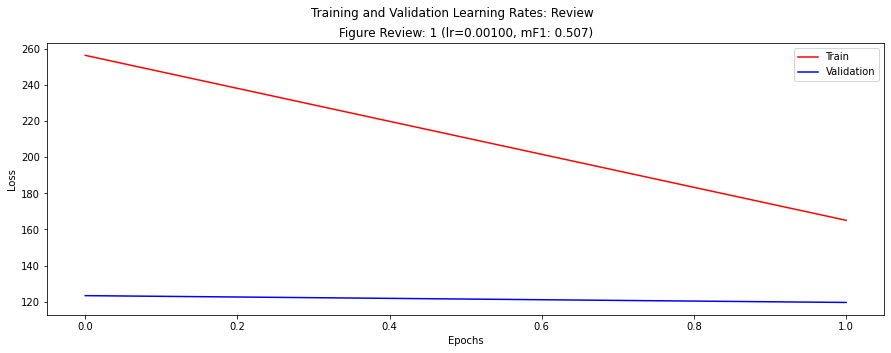

In [4]:
facade.epochs = 2
facade.train()
facade.test()
facade.write_result()
facade.plot_result()
facade.persist_result()

## Tune hyperparameters

Set model parameters to get a feel for where they need to be before changing features.

2020-12-29 13:39:20,060[INFO]zensols.deeplearn.model.executor.status: resetting executor
2020-12-29 13:39:20,061[INFO]zensols.deeplearn.model.facade: training...
2020-12-29 13:39:20,062[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 2
2020-12-29 13:39:20,063[INFO]zensols.deeplearn.model.executor.status: train/test sets: 41 6
2020-12-29 13:39:20,102[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
2020-12-29 13:39:20,122[INFO]zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 70 epochs using learning rate 0.001
  0%|                                                                                            | 0/70 [00:00<?, ?it/s]2020-12-29 13:39:20,125[INFO]zensols.deeplearn.model.executor.status: watching update file ../target/update.json
tr:116.184|va min:92.761|va:92.946 /\: 100%|██████████████████████████

Name: Review: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 12/29/2020 13:39:20:125792
    ended: 12/29/2020 13:41:09:112867
    batches: 41
    ave data points per batch: 197.2
    converged/epochs: 68/70
    ave/min loss: 115.44114/28.84808
    accuracy: 0.684 (5528/8086)
    micro: F1: 0.684, precision: 0.684, recall: 0.684
    macro: F1: 0.682, precision: 0.687, recall: 0.684
  validation:
    batches: 6
    ave data points per batch: 171.5
    converged/epochs: 69/70
    ave/min loss: 92.76096/12.26760
    accuracy: 0.729 (750/1029)
    micro: F1: 0.729, precision: 0.729, recall: 0.729
    macro: F1: 0.727, precision: 0.736, recall: 0.729
  test:
    started: 12/29/2020 13:41:09:686024
    ended: 12/29/2020 13:41:09:739591
    batches: 11
    ave data points per batch: 190.8
    converged/epochs: 1/1
    ave/min loss: 106.99344/46.50676
    accuracy: 0.709 (1488/2099)
    micro: F1: 0.709, precision: 0.709, recall: 0.709
    macro: F1: 0.706, precision: 0.716, recall: 

movie.model.ReviewNetwork (2)

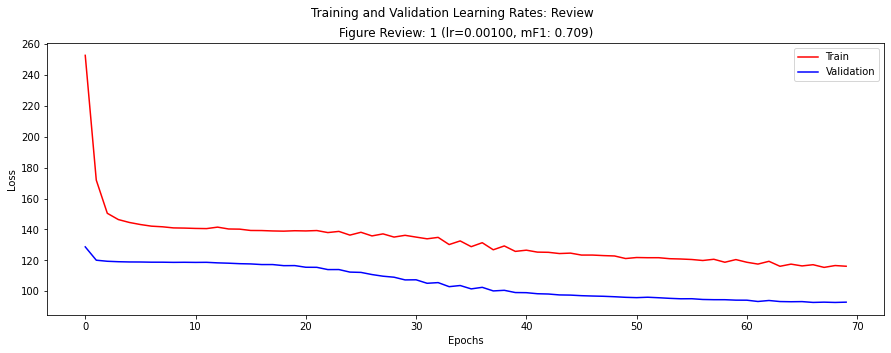

In [5]:
facade.learning_rate = 0.001
facade.epochs = 70
facade.dropout = 0.3
facade.train()
facade.test()
facade.write_result()
facade.plot_result()

2020-12-29 13:41:10,048[INFO]zensols.deepnlp.embed.word2vec: reading binary vector file
2020-12-29 13:41:10,049[INFO]zensols.deepnlp.embed.word2vec: loading keyed file: ../corpus/word2vec/GoogleNews-vectors-negative300.bin
2020-12-29 13:41:46,510[INFO]zensols.deepnlp.embed.word2vec: loaded key model from /home/landes/view/nlp/deepnlp/example/movie/notebook/../corpus/word2vec/GoogleNews-vectors-negative300.bin in 36s
2020-12-29 13:41:46,511[INFO]zensols.deepnlp.embed.word2vec: loaded word2vec model in 36s
2020-12-29 13:41:59,648[INFO]zensols.deepnlp.embed.word2vec: created data structures in 13s
2020-12-29 13:42:02,237[INFO]zensols.deepnlp.embed.domain: created tensor vectory matrix on use cuda: False, device: cpu
2020-12-29 13:42:02,894[INFO]zensols.deeplearn.model.facade: clearing
2020-12-29 13:42:03,499[INFO]zensols.deeplearn.model.facade: creating new executor
2020-12-29 13:42:03,505[INFO]zensols.deepnlp.embed.domain: reusing already cached from use cuda: False, device: cpu
2020-12-

Name: Review: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 12/29/2020 13:42:09:179669
    ended: 12/29/2020 13:43:29:937954
    batches: 41
    ave data points per batch: 197.2
    converged/epochs: 60/60
    ave/min loss: 83.96126/11.63944
    accuracy: 0.792 (6405/8086)
    micro: F1: 0.792, precision: 0.792, recall: 0.792
    macro: F1: 0.791, precision: 0.798, recall: 0.792
  validation:
    batches: 6
    ave data points per batch: 171.5
    converged/epochs: 47/60
    ave/min loss: 84.40384/9.22234
    accuracy: 0.764 (786/1029)
    micro: F1: 0.764, precision: 0.764, recall: 0.764
    macro: F1: 0.763, precision: 0.769, recall: 0.764
  test:
    started: 12/29/2020 13:43:34:171783
    ended: 12/29/2020 13:43:34:231492
    batches: 11
    ave data points per batch: 190.8
    converged/epochs: 1/1
    ave/min loss: 90.47513/34.12690
    accuracy: 0.771 (1618/2099)
    micro: F1: 0.771, precision: 0.771, recall: 0.771
    macro: F1: 0.768, precision: 0.781, recall: 0.7

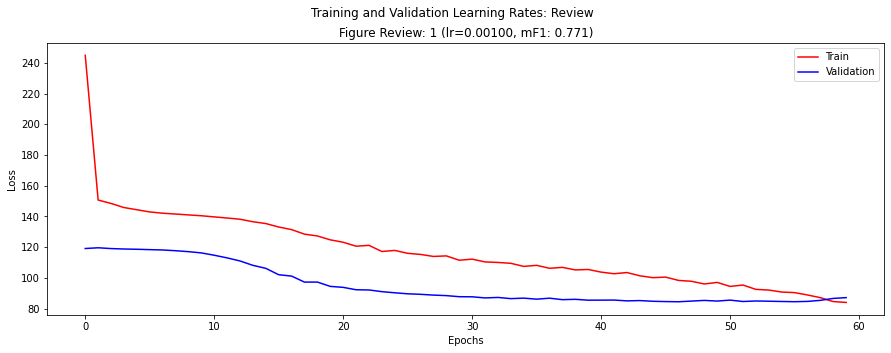

In [6]:
facade.epochs = 60
facade.embedding = 'word2vec_300_embedding'
facade.train()
facade.test()
facade.write_result()
facade.plot_result()
facade.persist_result()

2020-12-29 13:43:39,550[INFO]zensols.deeplearn.model.facade: clearing
2020-12-29 13:43:39,560[INFO]zensols.deeplearn.model.facade: creating new executor
2020-12-29 13:43:39,597[INFO]zensols.deeplearn.model.executor.status: resetting executor
2020-12-29 13:43:39,597[INFO]zensols.deeplearn.model.facade: training...
2020-12-29 13:43:39,611[INFO]zensols.deeplearn.model.executor.status: batch iteration: gpu, limit: 9223372036854775807, caching: True, cached: 0
2020-12-29 13:46:34,229[INFO]zensols.deeplearn.model.executor.status: loaded 47 batches in 2 minutes, 54s
2020-12-29 13:46:34,229[INFO]zensols.deeplearn.model.executor.status: train/test sets: 41 6
2020-12-29 13:46:34,235[INFO]zensols.deeplearn.model.executor.status: created model on cpu with use cuda: True, device: cuda:0
2020-12-29 13:46:34,238[INFO]zensols.deeplearn.model.executor.status: training model <class 'movie.model.ReviewNetwork'> on cuda:0 for 100 epochs using learning rate 0.001
  0%|                                      

Name: Review: 1
Run index: 2
Learning rate: 0.001
  train:
    started: 12/29/2020 13:46:34:241351
    ended: 12/29/2020 13:48:33:687832
    batches: 41
    ave data points per batch: 197.2
    converged/epochs: 91/100
    ave/min loss: 11.75897/5.23019
    accuracy: 0.958 (7748/8086)
    micro: F1: 0.958, precision: 0.958, recall: 0.958
    macro: F1: 0.958, precision: 0.961, recall: 0.958
  validation:
    batches: 6
    ave data points per batch: 171.5
    converged/epochs: 40/100
    ave/min loss: 64.71982/7.25821
    accuracy: 0.831 (855/1029)
    micro: F1: 0.831, precision: 0.831, recall: 0.831
    macro: F1: 0.830, precision: 0.842, recall: 0.831
  test:
    started: 12/29/2020 13:49:14:483536
    ended: 12/29/2020 13:49:14:544402
    batches: 11
    ave data points per batch: 190.8
    converged/epochs: 1/1
    ave/min loss: 80.88173/24.65763
    accuracy: 0.812 (1704/2099)
    micro: F1: 0.812, precision: 0.812, recall: 0.812
    macro: F1: 0.809, precision: 0.828, recall: 0.

movie.model.ReviewNetwork (2)

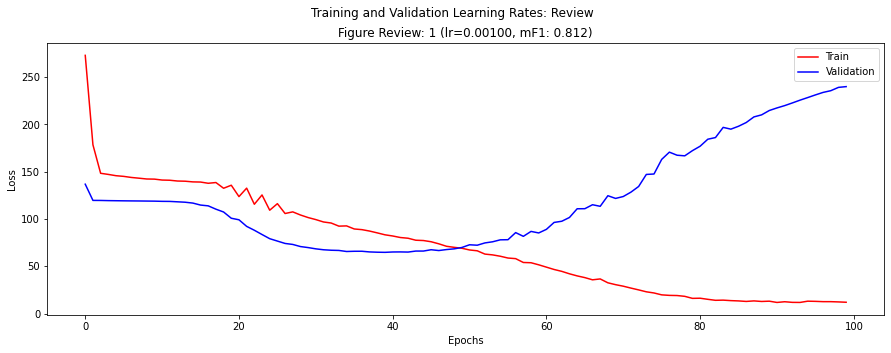

In [7]:
facade.epochs = 60
facade.embedding = 'bert_embedding'
facade.train()
facade.test()
facade.write_result()
facade.plot_result()